# Evaluación - Aprendizaje NO supervisado

**Integrante 1:**
+   Jonathan Olivares Garces

**Integrante 2:**
+   Cristobal Betancurt Palma

**Correo Electrónico integrante 1:**
+   Jonathan.Olivares2101@alumnos.ubiobio.cl

**Correo Electrónico integrante 2:**
+   Cristobal.Betacurt2101@alumnos.ubiobio.cl

---

## Descripción

Este notebook contiene la evaluación asociada al tópico de aprendizaje NO supervisado de la asignatura de Inteligencia Artificial de la carrera de Ingeniería Civil en informática de la UBB.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)
- kneed-0.8.5

# Descripción de los datos

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

In [179]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/affairs.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [180]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.base import TransformerMixin

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carga de datos

In [182]:
data_affair = pd.read_csv("affairs.csv")
data_affair.shape

(6366, 10)

# Análisis preliminar de los datos

In [183]:
data_affair.head(10)

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


#####  Primeros 10 datos 

In [184]:
data_affair.describe()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,3182.500000,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,1837.850239,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,1591.250000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,3182.500000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,4773.750000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,6365.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


#### Descripcion mas detallada de los datos incluyendo la cantidad que posee cada variable su mean std min y sus cuartiles

In [185]:
data_affair.dtypes

Unnamed: 0           int64
rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

#### se muestra que las 10 variables son cuantitativas

In [186]:
data_affair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


#### No existen valores nulos

## Analisis Rate Marriage

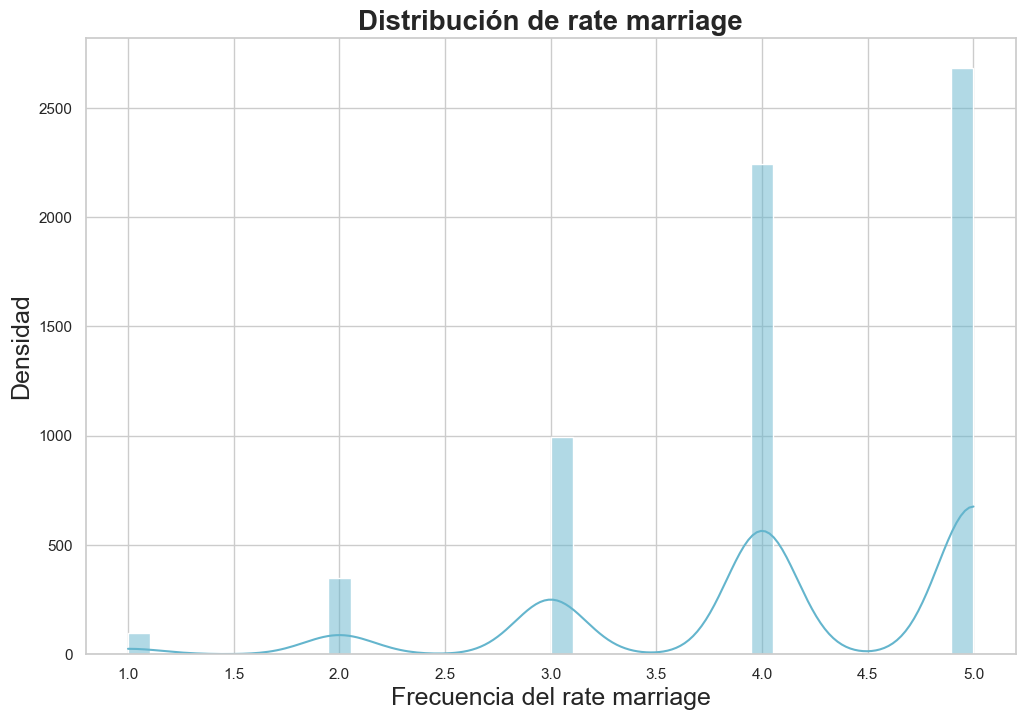

In [187]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['rate_marriage'], kde = True, color = 'c')
plt.title('Distribución de rate marriage', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia del rate marriage", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [188]:
pd.DataFrame(data_affair.rate_marriage.describe()).T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.96143,1.0,4.0,4.0,5.0,5.0


In [189]:
pd.DataFrame(data_affair['rate_marriage'].value_counts())

,count
rate_marriage,
5.0,2684
4.0,2242
3.0,993
2.0,348
1.0,99


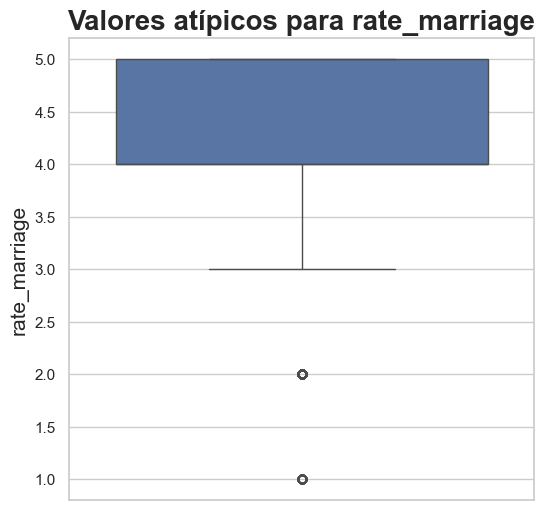

In [190]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para rate_marriage", fontsize=20, fontweight="bold")
plt.ylabel("rate_marriage", fontsize=15)
sns.boxplot(y='rate_marriage',data=data_affair);

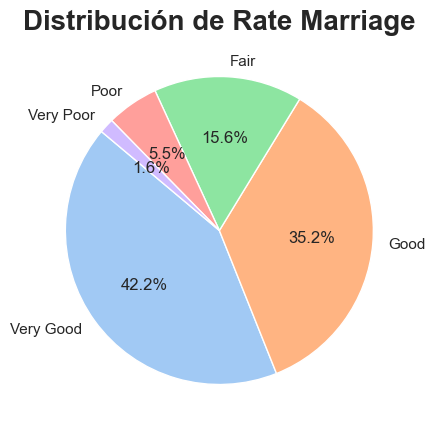

In [191]:
# Contar los valores de rate_marriage
rate_marriage_counts = data_affair['rate_marriage'].value_counts()

# Definir las etiquetas
labels = ['Very Good', 'Good', 'Fair', 'Poor', 'Very Poor']

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(rate_marriage_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Rate Marriage', fontsize=20, fontweight="bold")
plt.show()

### Comentarios acerca de rate marriage
+   El 42.2% de los individuos califican su matrimonio como "Buy Bueno"
+   Solo el 1.6% de individuos califican su matrimonio como "Muy Malo"
+   Existen valores atipicos
+   Las calificaciones predominantes son de "Very Good" y "Good"

## Analisis Age

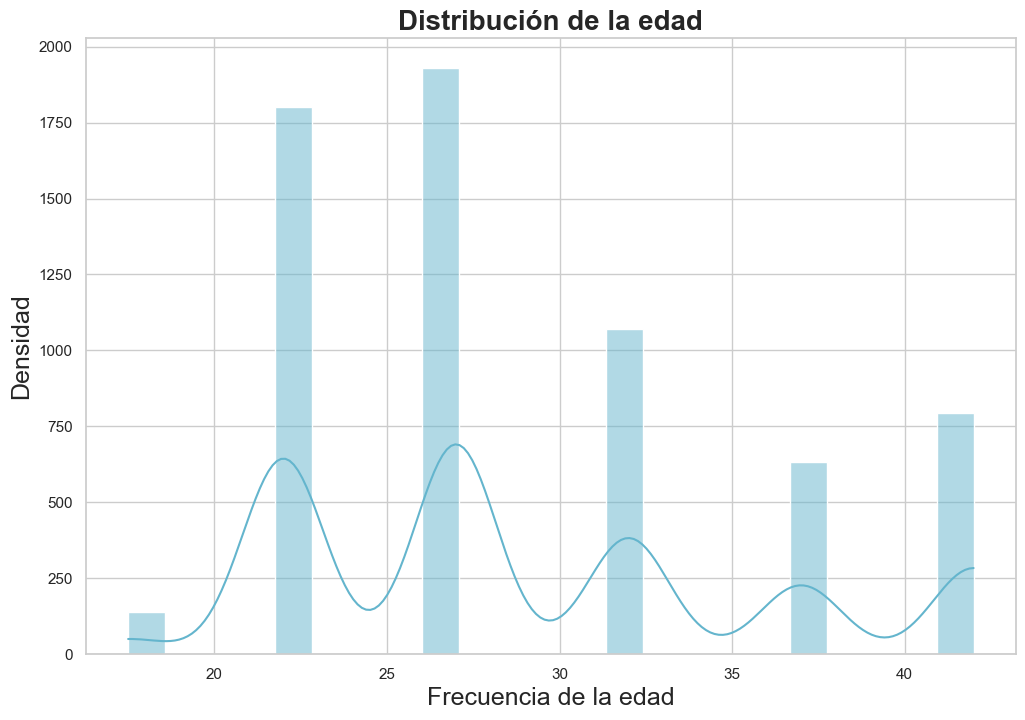

In [192]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['age'], kde = True, color = 'c')
plt.title('Distribución de la edad', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia de la edad", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [193]:
pd.DataFrame(data_affair.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.0,42.0


In [194]:
pd.DataFrame(data_affair['age'].value_counts())

,count
age,
27.0,1931
22.0,1800
32.0,1069
42.0,793
37.0,634
17.5,139


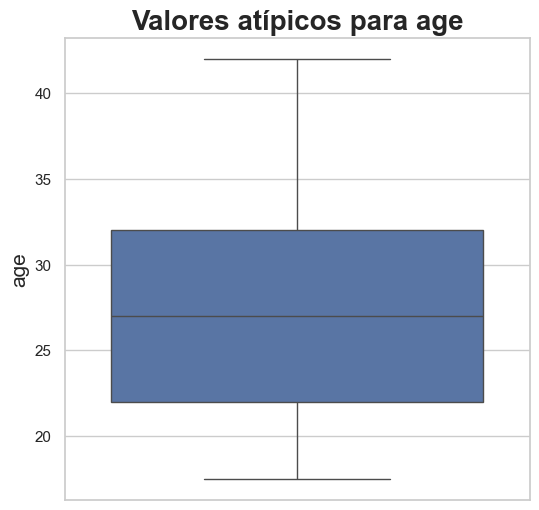

In [195]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para age", fontsize=20, fontweight="bold")
plt.ylabel("age", fontsize=15)
sns.boxplot(y='age',data=data_affair);

In [196]:
# Redondear los valores de edad que sean de 17.5 años a 17
data_affair['age'] = data_affair['age'].replace(17.5, 17)

# Verificar que los valores han sido redondeados
data_affair['age'].value_counts()

age
27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.0     139
Name: count, dtype: int64

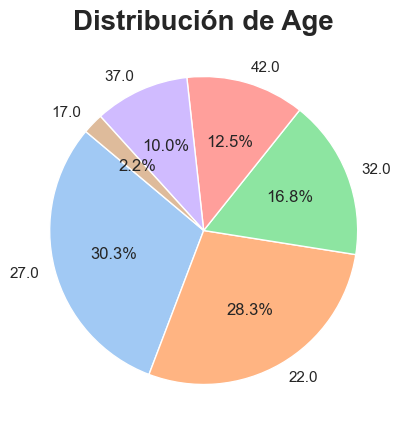

In [197]:
# Contar los valores de age
age_counts = data_affair['age'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Age', fontsize=20, fontweight="bold")
plt.show()

In [198]:
pd.DataFrame(data_affair.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,6366.0,29.071945,6.866715,17.0,22.0,27.0,32.0,42.0


### Comentarios acerca de la edad de los individuos 
+   La mayor edad que presenta un individuo es de 42 años
+   La mayoria de los individuos poseen 27 años (31,3%)
+   El valor promedio de edad es de 29 
+   El individuo con menos edad es de 17 años
+   No existen valores atipicos (outliers)

## Analisis yrs_married

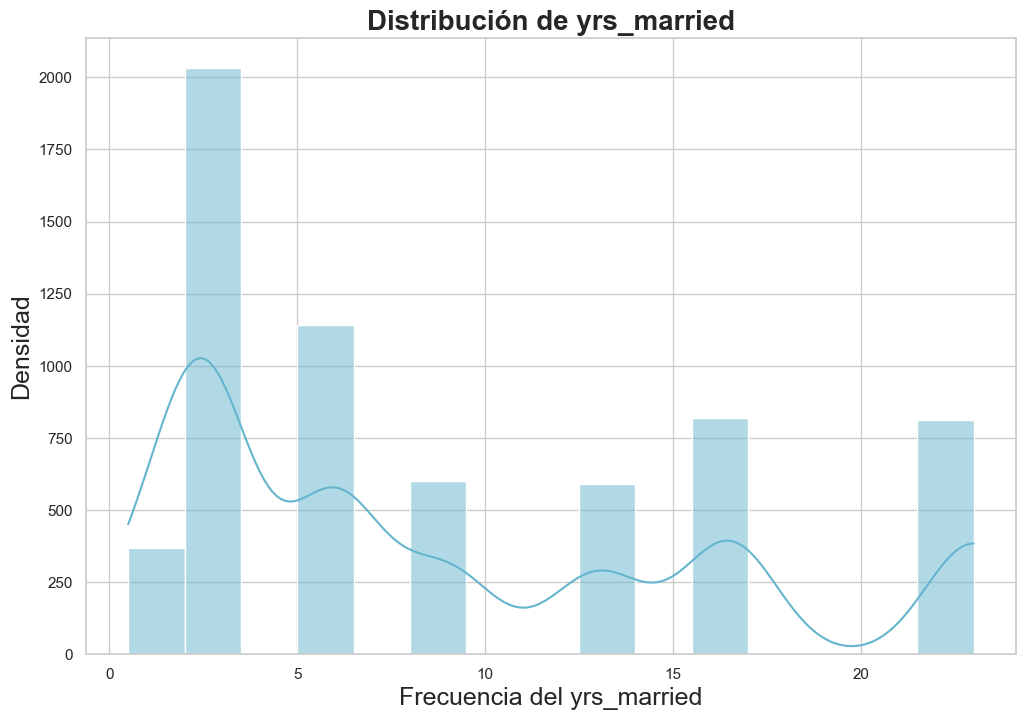

In [199]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['yrs_married'], kde = True, color = 'c')
plt.title('Distribución de yrs_married', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia del yrs_married", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [200]:
pd.DataFrame(data_affair.yrs_married.describe()).T

,count,mean,std,min,25%,50%,75%,max
yrs_married,6366.0,9.009425,7.28012,0.5,2.5,6.0,16.5,23.0


In [201]:
pd.DataFrame(data_affair['yrs_married'].value_counts())

,count
yrs_married,
2.5,2034
6.0,1141
16.5,818
23.0,811
9.0,602
13.0,590
0.5,370


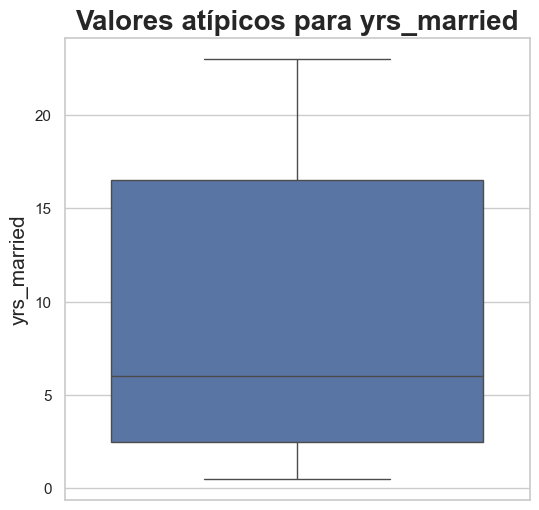

In [202]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para yrs_married", fontsize=20, fontweight="bold")
plt.ylabel("yrs_married", fontsize=15)
sns.boxplot(y='yrs_married',data=data_affair);

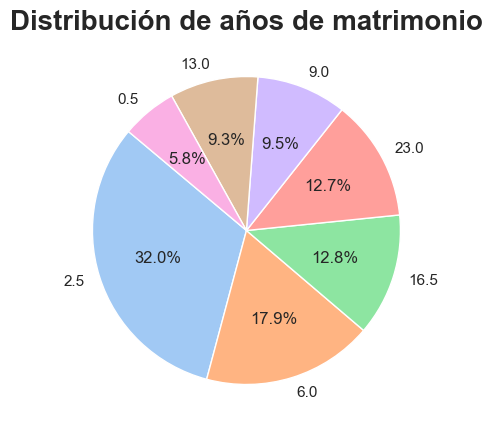

In [203]:
# Contar los valores de age
yrs_married__counts = data_affair['yrs_married'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(yrs_married__counts, labels=yrs_married__counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de años de matrimonio', fontsize=20, fontweight="bold")
plt.show()

### Comentarios sobre Años de matrimonio
+   La mayoria de los individuos poseen 2.5 años de matrimonio
+   La minima de individuos poseen 0.5 años de matrimonio 
+   Los individuos con la mayor cantidad de años de matrimonio cuentan con 16.5 años
+   Los individuos con el menos tiempo de matrimonio son de 0.5 años 
+   La media de años de matrimonio es de 9 años 
+   No hay valores atipicos(outliers)

## Analisis para children

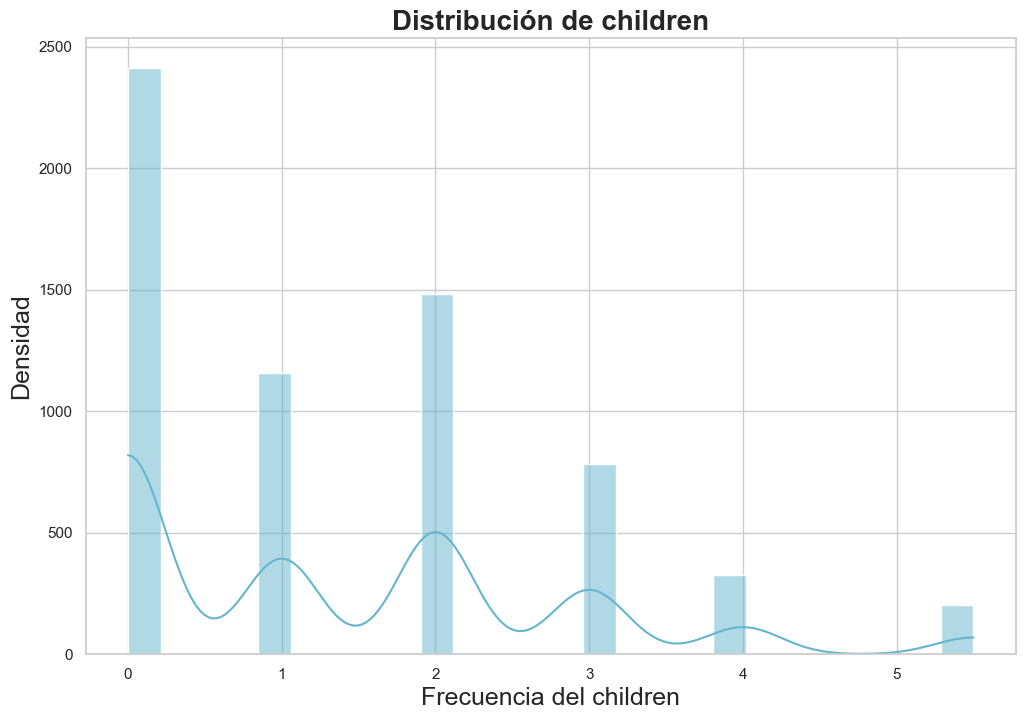

In [204]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['children'], kde = True, color = 'c')
plt.title('Distribución de children', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia del children", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [205]:
pd.DataFrame(data_affair.children.describe()).T

,count,mean,std,min,25%,50%,75%,max
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.0,5.5


In [206]:
pd.DataFrame(data_affair['children'].value_counts())

,count
children,
0.0,2414
2.0,1481
1.0,1159
3.0,781
4.0,328
5.5,203


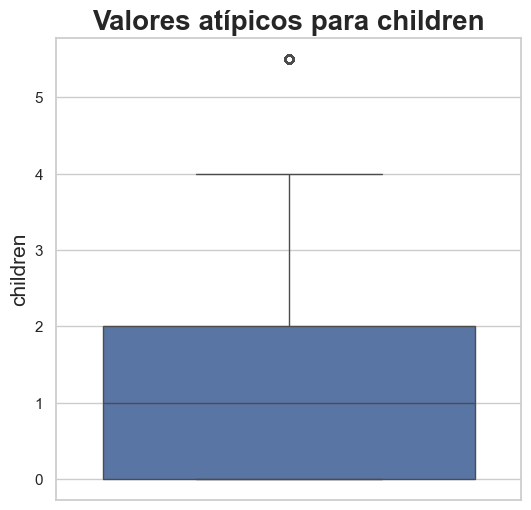

In [207]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para children", fontsize=20, fontweight="bold")
plt.ylabel("children", fontsize=15)
sns.boxplot(y='children',data=data_affair);

In [208]:
# Eliminar los valores atípicos de la columna 'children' que son iguales a 5.5
data_affair = data_affair[data_affair['children'] != 5.5]

# Verificar que los valores atípicos han sido eliminados
data_affair['children'].value_counts()

children
0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
Name: count, dtype: int64

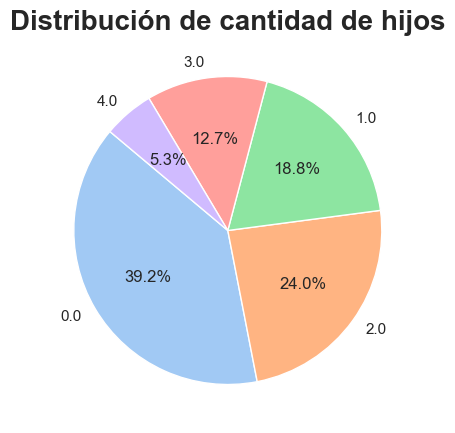

In [209]:
# Contar los valores de age
children_counts = data_affair['children'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de cantidad de hijos', fontsize=20, fontweight="bold")
plt.show()

In [210]:
pd.DataFrame(data_affair.children.describe()).T

,count,mean,std,min,25%,50%,75%,max
children,6163.0,1.261723,1.244843,0.0,0.0,1.0,2.0,4.0


### Comentarios sobre la cantidad de hijos
+   Los individuos con mayor cantidad de hijos poseen 4 hijos
+   Los individuos con menor cantidad de hijos posee 0 hijos (39.2%)
+   La media de hijos es de 1.2 = 1 hijo
+   Existen valores atipicos(outliers)

### Analisis Bivariado

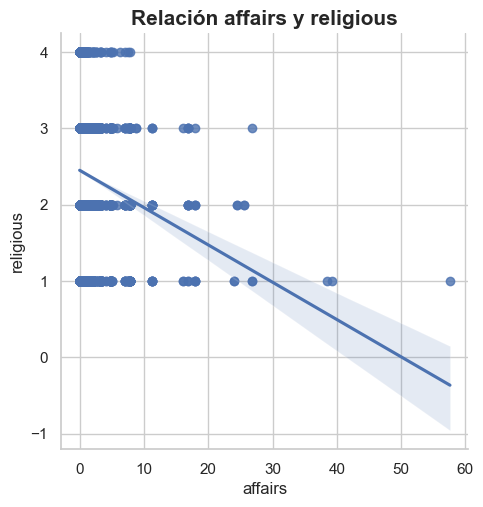

In [235]:
ax = sns.lmplot(x = 'affairs', y = 'religious', data=data_affair, palette='Set1')
plt.title("Relación affairs y religious", fontsize=15, fontweight="bold")
plt.show()

## Analisis Relacion entre Religion y affairs
Este grafico muestra la relacion entre religion y affairs lo que nos muestra es el hecho de que mientras mayor sea el nivel religioso la cantidad de valor para engaño o affairs es menor por el lado contrario muestra que mientras menos sea el nivel religioso de los individuos tienden a tener un valor mas alto en affairs y su pendiente es grande

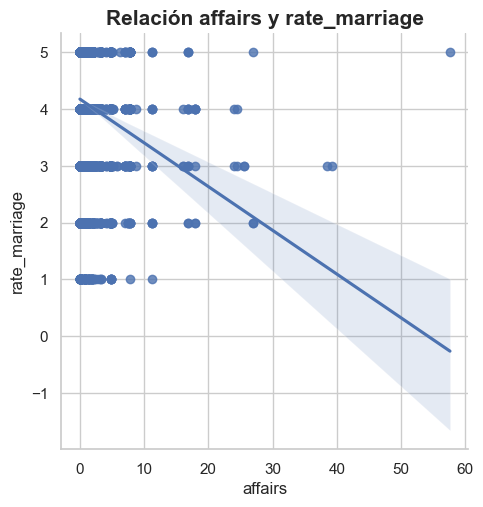

In [238]:
ax = sns.lmplot(x = 'affairs', y = 'rate_marriage', data=data_affair, palette='Set1')
plt.title("Relación affairs y rate_marriage", fontsize=15, fontweight="bold")
plt.show()

### Analisis de relacion entre rate_marriage y affairs 

El grafico muestra la relacion entre rate_marriage y affairs el analisis muestra que mientras mejor califique el individuo su matrimonio los valores de affairs disminuyen y al contrario mientras menor calificacion de satisfaccion le de a su matrimonio el indice de affairs o infedilidad se dispara
y posee una pendiente grande

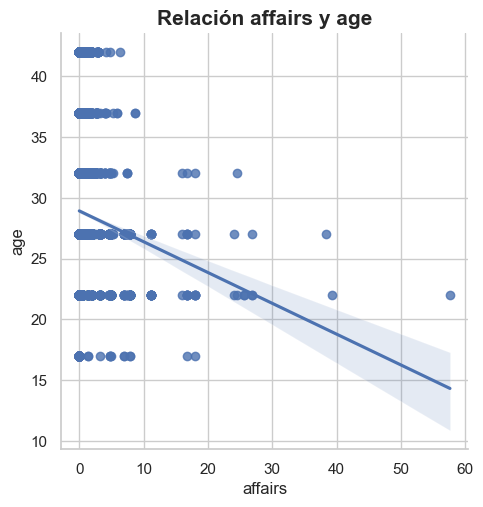

In [244]:
ax = sns.lmplot(x = 'affairs', y = 'age', data=data_affair, palette='Set1')
plt.title("Relación affairs y age", fontsize=15, fontweight="bold")
plt.show()


### Analisis de relacion entre affairs y age 

El analisis mostro que mientras menos edad posean los individuos tienden a tener un affairs mayor y por lo contrario mientras mas edad tienen los individuos si affairs es menor, el grafico presenta una pendiente inclinada

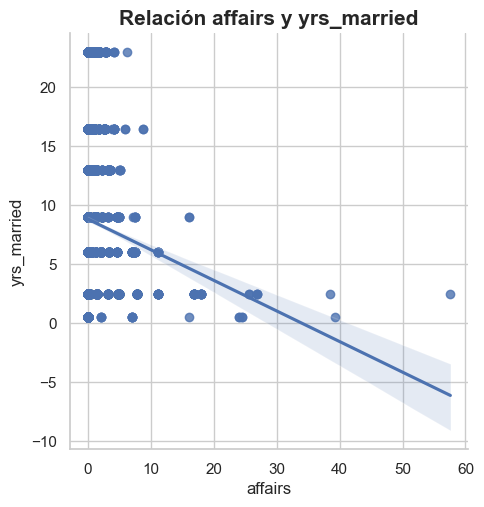

In [245]:
ax = sns.lmplot(x = 'affairs', y = 'yrs_married', data=data_affair, palette='Set1')
plt.title("Relación affairs y yrs_married", fontsize=15, fontweight="bold")
plt.show()

### Analisis entre affairs y yrs_married 

El analisis del grafico muestra que mientras menos años tenga el matrimonio el indice de affairs es mayor por lo contrario mientras mas años posean de matrimonio los valores de affairs son menores, el grafico presenta una pendiente inclinada

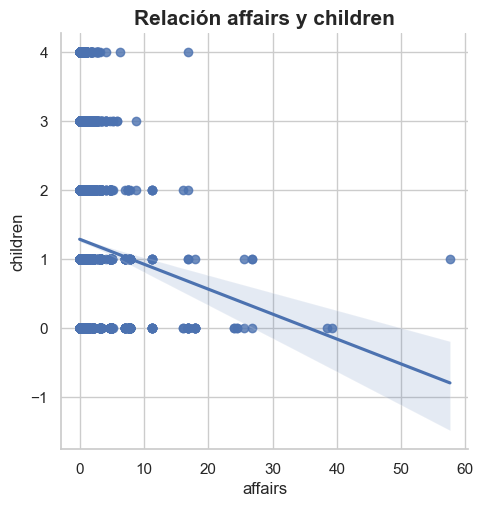

In [246]:
ax = sns.lmplot(x = 'affairs', y = 'children', data=data_affair, palette='Set1')
plt.title("Relación affairs y children", fontsize=15, fontweight="bold")
plt.show()

### Analisis de affairs y children 

El analisis mostro que mientras mayor sea la cantidad de hijos que posee el matrimonio menos es la tendencia a poseer un affairs mayor, por lo contrario mientras menos hijos posean en el matrimonio el indice de affairs tiende a aumentar, posee un pendiente inclinada

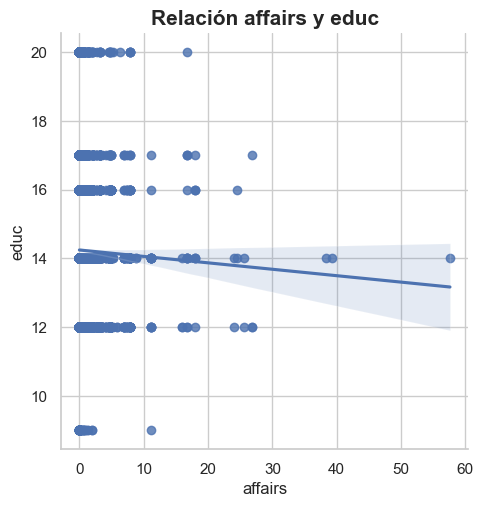

In [247]:
ax = sns.lmplot(x = 'affairs', y = 'educ', data=data_affair, palette='Set1')
plt.title("Relación affairs y educ", fontsize=15, fontweight="bold")
plt.show()

### Analisis de affairs con el nivel educacional de los individuos (educ)

El analisis del grafico muestra que la pendiente entre la variable affairs y el nivel educacional de los individuos es baja por lo que no poseen una relacion que afecte mucho al otro por lo que al momento de poseer una affairs eleveado da igual hasta que nivel educativo llego el individuo 

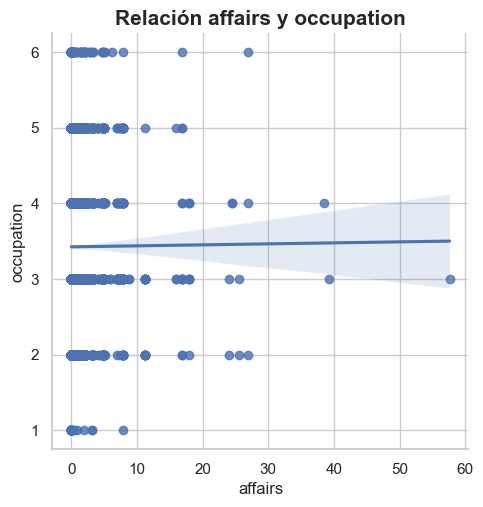

In [248]:
ax = sns.lmplot(x = 'affairs', y = 'occupation', data=data_affair, palette='Set1')
plt.title("Relación affairs y occupation", fontsize=15, fontweight="bold")
plt.show()

### Analisis de la relacion entre affairs y occupation 

El analisis muestra que no afecta mucho la ocupacion del individuo sobre el indice de engaño o affairs que existe, y posee una pendiente casi inexistente 

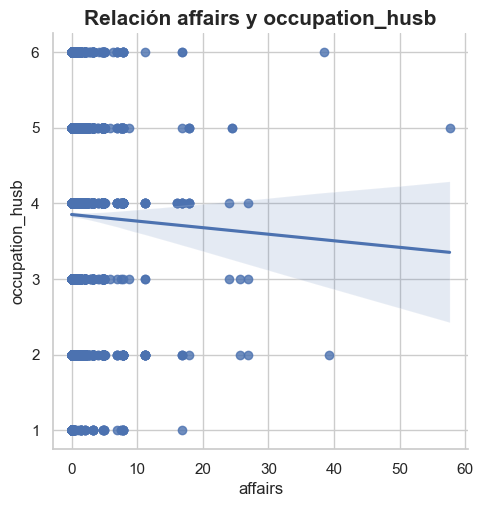

In [249]:
ax = sns.lmplot(x = 'affairs', y = 'occupation_husb', data=data_affair, palette='Set1')
plt.title("Relación affairs y occupation_husb", fontsize=15, fontweight="bold")
plt.show()

### Analisis de la relacion entre affairs y occupation_husb

El analisis muestra que no afecta mucho la ocupacion del marido sobre el indice de engaño o affairs que existe, y posee una pendiente casi inexistente 

# Modelos de segmentación

In [251]:
features = data_affair.drop(columns=['Unnamed: 0', 'occupation', 'occupation_husb', 'educ']).columns
X = data_affair[features]


In [252]:
X.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious',
       'affairs'],
      dtype='object')

In [253]:
model_kmeans = KMeans(n_clusters = 5, random_state=29)
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=29)

In [272]:
# Muestra los % de ocurrencias de cada clase considerando la agrupación que hizo el modelo de segmentación
count_0 = list(model_kmeans.labels_).count(0)
count_1 = list(model_kmeans.labels_).count(1)
count_2 = list(model_kmeans.labels_).count(2)
count_3 = list(model_kmeans.labels_).count(3)
count_4 = list(model_kmeans.labels_).count(4)

percentaje_0 = (count_0 / len(model_kmeans.labels_)) * 100
percentaje_1 = (count_1 / len(model_kmeans.labels_)) * 100
percentaje_2 = (count_2 / len(model_kmeans.labels_)) * 100
percentaje_3 = (count_3 / len(model_kmeans.labels_)) * 100
percentaje_4 = (count_4 / len(model_kmeans.labels_)) * 100

print("Individuos Grupo 1 {0} que representa un {1:.1f}%".format(count_0, percentaje_0))
print("Individuos Grupo 2 {0} que representa un {1:.1f}%".format(count_1, percentaje_1))
print("Individuos Grupo 3 {0} que representa un {1:.1f}%".format(count_2, percentaje_2))
print("Individuos Grupo 4 {0} que representa un {1:.1f}%".format(count_3, percentaje_3))
print("Individuos Grupo 5 {0} que representa un {1:.1f}%".format(count_4, percentaje_4))


Individuos Grupo 1 1979 que representa un 32.1%
Individuos Grupo 2 568 que representa un 9.2%
Individuos Grupo 3 670 que representa un 10.9%
Individuos Grupo 4 1938 que representa un 31.4%
Individuos Grupo 5 1008 que representa un 16.4%


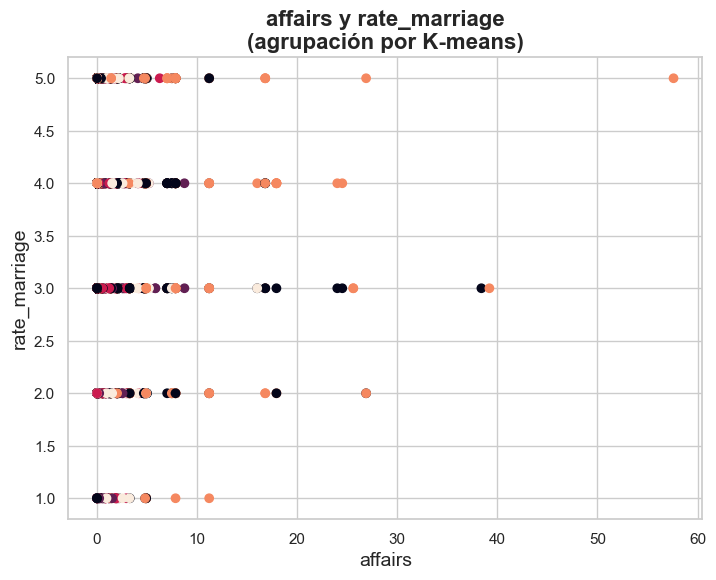

In [264]:
# Configuración de la figura
plt.figure(figsize=(18, 6))

# Primer gráfico: agrupamiento usando K-means
plt.subplot(1, 2, 1)
plt.scatter(X.affairs, X.rate_marriage, c=model_kmeans.labels_)
plt.title("affairs y rate_marriage\n(agrupación por K-means)", fontsize=16, fontweight="bold")
plt.xlabel("affairs", fontsize=14)
plt.ylabel("rate_marriage", fontsize=14)


# Ajuste y visualización
plt.show()

In [274]:
# Consolida los datos considerando el resultado de kmeans
grouped_data = pd.DataFrame(X, columns = X.columns)
grouped_data['grupo'] = model_kmeans.labels_

In [275]:
len(grouped_data.query('grupo == 0'))

1979

In [276]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 0][['affairs', 'rate_marriage']].describe().T

,count,mean,std,min,25%,50%,75%,max
affairs,1979.0,0.812251,2.271626,0.0,0.0,0.0,0.583333,38.399994
rate_marriage,1979.0,4.132390,0.914249,1.0,4.0,4.0,5.000000,5.000000


In [277]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 1][['affairs', 'rate_marriage']].describe().T

,count,mean,std,min,25%,50%,75%,max
affairs,568.0,0.418500,0.922934,0.0,0.0,0.0,0.727273,8.727272
rate_marriage,568.0,3.947183,1.037579,1.0,3.0,4.0,5.000000,5.000000


In [278]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 2][['affairs', 'rate_marriage']].describe().T

,count,mean,std,min,25%,50%,75%,max
affairs,670.0,0.392083,0.721281,0.0,0.0,0.0,0.521739,6.260869
rate_marriage,670.0,3.952239,1.084248,1.0,3.0,4.0,5.000000,5.000000


In [279]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 3][['affairs', 'rate_marriage']].describe().T

,count,mean,std,min,25%,50%,75%,max
affairs,1938.0,0.907737,3.075836,0.0,0.0,0.0,0.0,57.599991
rate_marriage,1938.0,4.244582,0.877078,1.0,4.0,4.0,5.0,5.000000


In [280]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 4][['affairs', 'rate_marriage']].describe().T

,count,mean,std,min,25%,50%,75%,max
affairs,1008.0,0.546970,1.074412,0.0,0.00,0.0,0.742424,16.0
rate_marriage,1008.0,4.037698,0.997797,1.0,3.75,4.0,5.000000,5.0


# Análisis de los grupos

### Análisis usando normalización

In [281]:
# Función para aplicar scaler
def rescale_data(df : pd.DataFrame, scaler : TransformerMixin):
    """
    Recibe un dataframe y un método de escalamiento de variables.
    Retorna un dataframe con las variables escaladas utilizando el método especificado.
    """
    features_names = df.columns
    if scaler != None:
        features_rescaled = scaler.fit_transform(df) # Transformamos los datos utilizando un método de escalamiento.
        return pd.DataFrame(features_rescaled,columns=features_names)
    else:
        return df

In [283]:
def view_class(labels : np.array, y : np.array):
  # Muestra los % de ocurrencias de cada clase considerando la agrupación que hizo el modelo de segmentación
  count_0 = list(labels).count(0)
  count_1 = list(labels).count(1)
  count_2 = list(labels).count(2)
  count_3 = list(labels).count(3)
  count_4 = list(labels).count(4)
  print("Pacientes Grupo 1 {0} representando un {1:.1f}%".format(count_0, 100*count_0/len(y)))
  print("Pacientes Grupo 2 {0} representando un {1:.1f}%".format(count_1, 100*count_1/len(y)))
  print("Pacientes Grupo 3 {0} representando un {1:.1f}%".format(count_2, 100*count_2/len(y)))
  print("Pacientes Grupo 4 {0} representando un {1:.1f}%".format(count_3, 100*count_3/len(y)))
  print("Pacientes Grupo 5 {0} representando un {1:.1f}%".format(count_4, 100*count_4/len(y)))

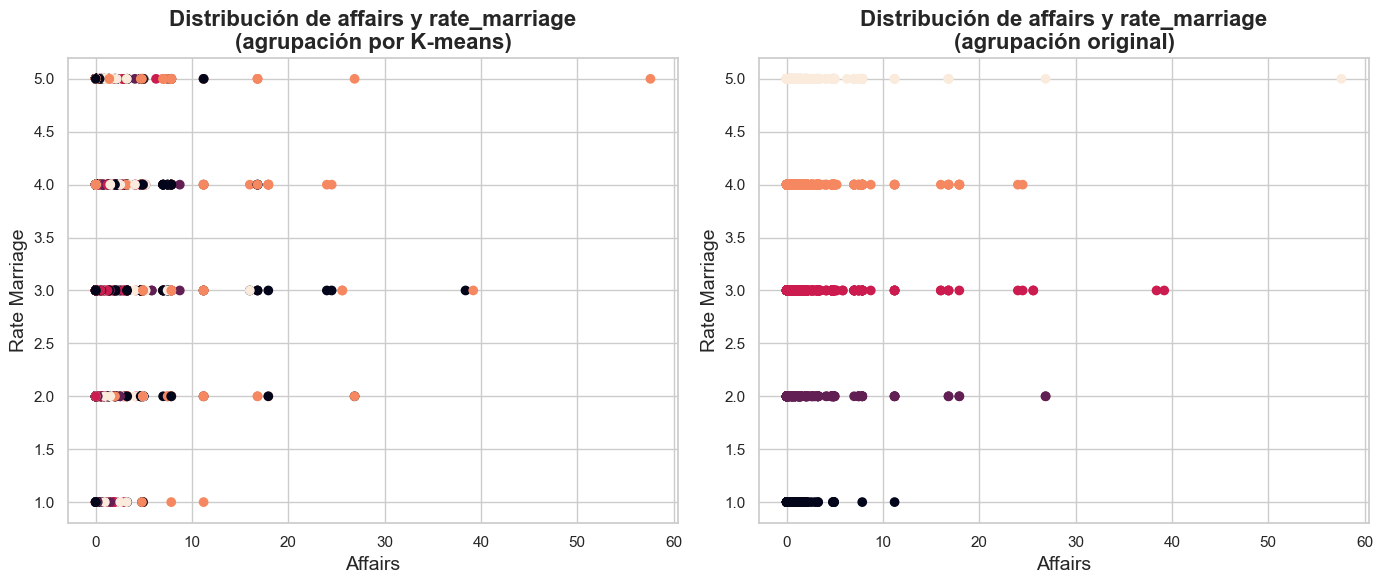

In [284]:
def view_graphs(model_kmeans: KMeans, X: pd.DataFrame, columns: np.array, labels_columns: np.array, original_label: np.array):
    # Configuración de la figura
    plt.figure(figsize=(14, 6))

    # Primer gráfico: agrupamiento usando K-means
    plt.subplot(1, 2, 1)
    plt.scatter(X[columns[0]], X[columns[1]], c=model_kmeans.labels_)
    plt.title("Distribución de affairs y rate_marriage\n(agrupación por K-means)", fontsize=16, fontweight="bold")
    plt.xlabel(labels_columns[0], fontsize=14)
    plt.ylabel(labels_columns[1], fontsize=14)

    # Segundo gráfico: agrupación original
    plt.subplot(1, 2, 2)
    plt.scatter(X[columns[0]], X[columns[1]], c=original_label)
    plt.title("Distribución de affairs y rate_marriage\n(agrupación original)", fontsize=16, fontweight="bold")
    plt.xlabel(labels_columns[0], fontsize=14)
    plt.ylabel(labels_columns[1], fontsize=14)

    # Ajuste y visualización
    plt.tight_layout()
    plt.show()

# Uso de la función con las variables y datos proporcionados
columns = np.array(['affairs', 'rate_marriage'])
labels_columns = np.array(['Affairs', 'Rate Marriage'])
original_label = data_affair['rate_marriage']

view_graphs(model_kmeans, X, columns, labels_columns, original_label)

In [285]:
features_minmax = rescale_data(data_affair[features], MinMaxScaler())

In [286]:
features_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6163.0,0.778882,0.238662,0.0,0.750000,0.750000,1.000000,1.0
age,6163.0,0.469479,0.267500,0.0,0.200000,0.400000,0.600000,1.0
yrs_married,6163.0,0.361007,0.313071,0.0,0.088889,0.244444,0.555556,1.0
children,6163.0,0.315431,0.311211,0.0,0.000000,0.250000,0.500000,1.0
religious,6163.0,0.471578,0.292228,0.0,0.333333,0.333333,0.666667,1.0
affairs,6163.0,0.012447,0.038792,0.0,0.000000,0.000000,0.008418,1.0


In [290]:
model_kmeans_x = KMeans(n_clusters = 5, random_state=29)
model_kmeans_x.fit(features_minmax)

KMeans(n_clusters=5, random_state=29)

In [291]:
view_class(model_kmeans_x.labels_, model_kmeans_x.labels_)

Pacientes Grupo 1 1312 representando un 21.3%
Pacientes Grupo 2 1197 representando un 19.4%
Pacientes Grupo 3 715 representando un 11.6%
Pacientes Grupo 4 1581 representando un 25.7%
Pacientes Grupo 5 1358 representando un 22.0%


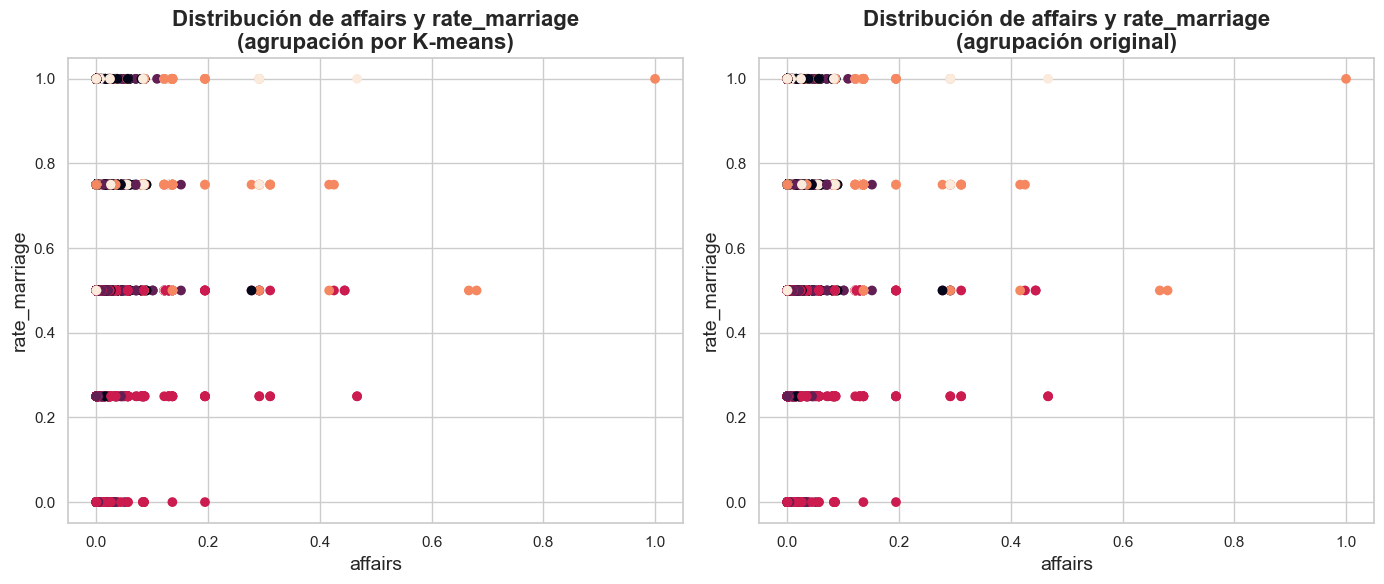

In [293]:
view_graphs(model_kmeans_x, features_minmax, ["affairs", "rate_marriage"], ["affairs", "rate_marriage"], model_kmeans_x.labels_)

# Comentarios finales